In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [142]:
df = pd.read_csv('weather/1h/weather16-24.csv', index_col=0, parse_dates=True)
df.rename(columns={'averageAirTemp': 'AirTemp', 'averageRelativeHumidity': 'RelativeHumidity', 'averageWindSpeed': 'WindSpeed', 'averageWindDirection': 'WindDirection','averageAirPressure': 'AirPressure'}, inplace=True)

In [143]:
display(df)
# max wind speed for an hour

,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
time,,,,,,,,
2016-01-01 00:00:00,-8.871667,0.000000,0.00,1.7,70.875000,280.0,0.771667,1000.903333
2016-01-01 01:00:00,-9.153333,0.000000,0.00,1.1,71.593333,265.0,0.703333,1000.516667
2016-01-01 02:00:00,-9.475000,0.000000,0.00,1.4,71.685000,269.0,0.698333,1000.363333
2016-01-01 03:00:00,-9.851667,0.000000,0.00,1.6,71.863333,283.0,0.743333,1000.123333
2016-01-01 04:00:00,-10.175000,0.000000,0.00,1.4,71.668333,286.0,0.661667,1000.190000
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,4.635000,0.000000,0.00,1.6,74.210000,77.0,0.866667,980.588333
2023-12-31 20:00:00,4.368333,0.000000,0.00,1.4,74.971667,21.0,0.721667,980.480000
2023-12-31 21:00:00,3.943333,0.000000,0.00,1.2,76.206667,339.0,0.546667,980.611667


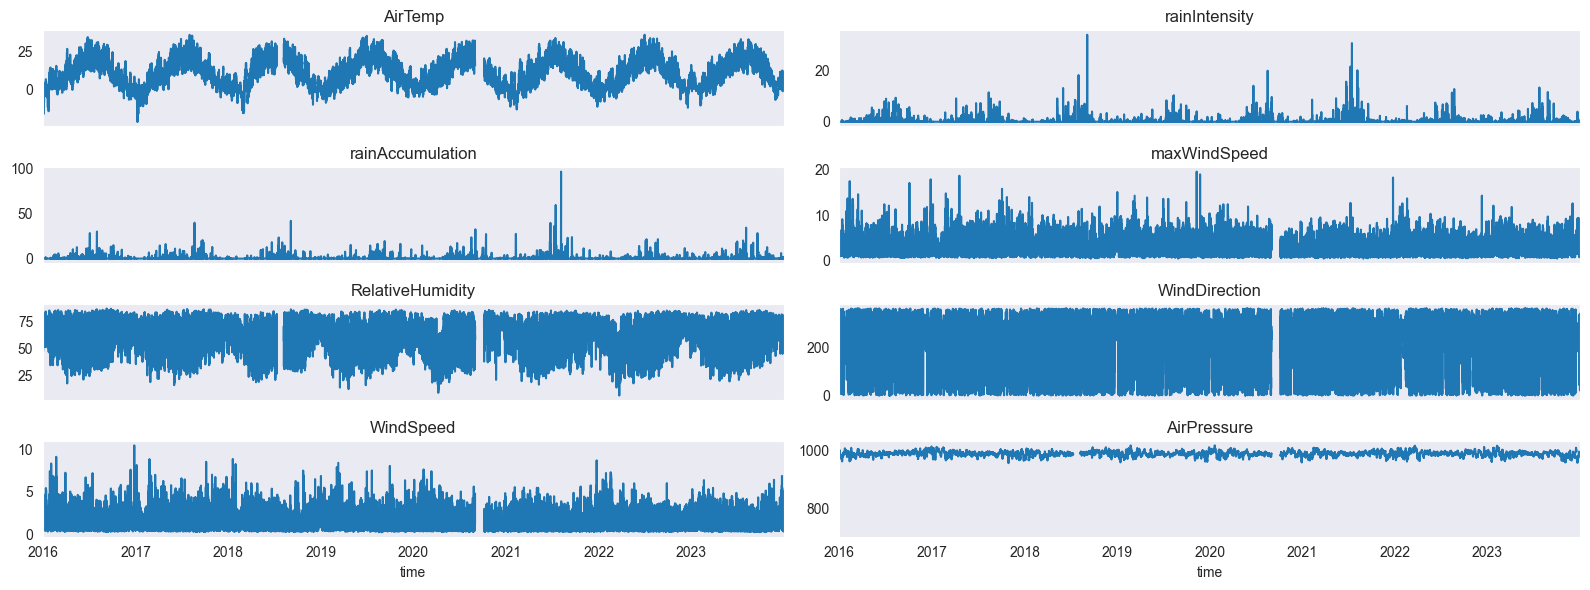

In [144]:
fig, axes = plt.subplots(4, 2, figsize=(16, 6), sharex=True)
for i, ax in enumerate(axes.flat): # different col number
    df.iloc[:, i].plot(ax=ax, title=df.columns[i], legend=False)
    ax.set_xlim(df.index[0], df.index[-1])
    ax.grid()     
fig.tight_layout()
plt.show()

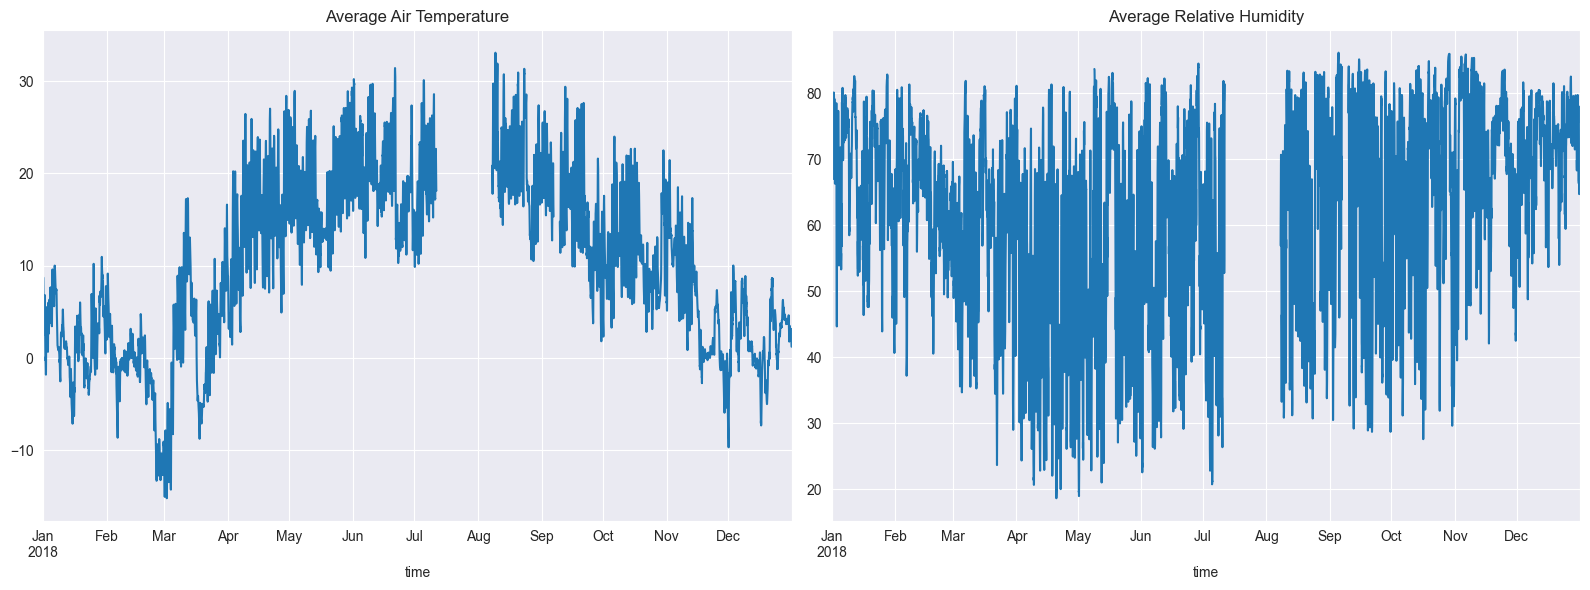

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)
df_2018 = df[df.index.year == 2018]
df_2018['AirTemp'].plot(ax=axes[0], title='Average Air Temperature', legend=False)
df_2018['RelativeHumidity'].plot(ax=axes[1], title='Average Relative Humidity', legend=False)    
fig.tight_layout()
plt.show()

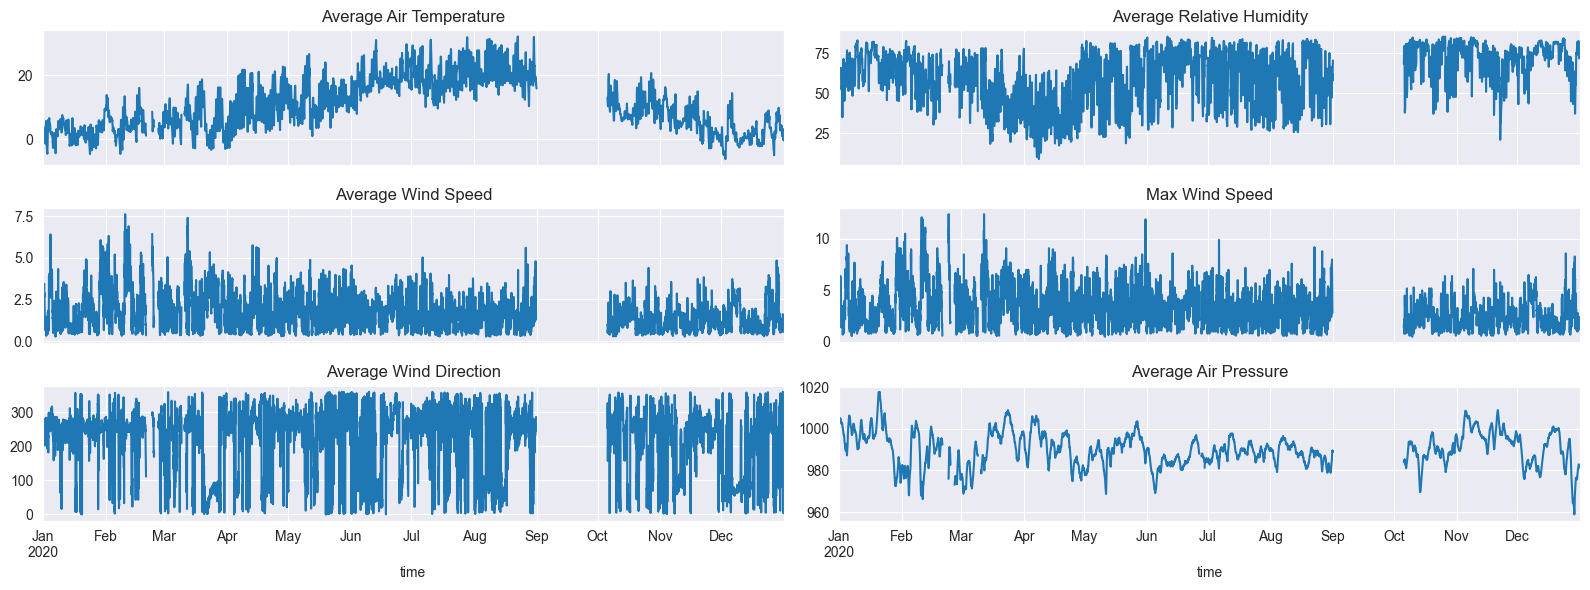

In [146]:
fig, axes = plt.subplots(3, 2, figsize=(16, 6), sharex=True)
df_2020 = df[df.index.year == 2020]

df_2020['AirTemp'].plot(ax=axes[0, 0], title="Average Air Temperature")
df_2020['RelativeHumidity'].plot(ax=axes[0, 1], title="Average Relative Humidity")
df_2020['WindSpeed'].plot(ax=axes[1, 0], title="Average Wind Speed")
df_2020['maxWindSpeed'].plot(ax=axes[1, 1], title="Max Wind Speed")
df_2020['WindDirection'].plot(ax=axes[2, 0], title="Average Wind Direction")
df_2020['AirPressure'].plot(ax=axes[2, 1], title="Average Air Pressure")

fig.tight_layout()
plt.show()


In [147]:
df.isnull().sum() / df.shape[0] * 100

AirTemp             4.449008
rainIntensity       2.140372
rainAccumulation    2.140372
maxWindSpeed        3.425165
RelativeHumidity    4.449008
WindDirection       3.425165
WindSpeed           3.425165
AirPressure         4.449008
dtype: float64

In [148]:
full_time = pd.date_range(start='2016-01-01 00:00:00', end='2023-12-31 23:00:00', freq='h')
df = df.reindex(full_time)

In [149]:
df.isnull().sum() / df.shape[0] * 100 # there were all dates

AirTemp             4.449008
rainIntensity       2.140372
rainAccumulation    2.140372
maxWindSpeed        3.425165
RelativeHumidity    4.449008
WindDirection       3.425165
WindSpeed           3.425165
AirPressure         4.449008
dtype: float64

In [150]:
def missing_periods(df, column):
    print(f"Dla {column}:\n")
    missing_data = df.isna()
    missing_intervals = []
    start = None
    # if nan value -> starting interval
    for i, is_missing in enumerate(missing_data[column].values):
        if is_missing:
            if start is None:
                start = df.index[i]
        else: # empty interval has finished / doesn't exist
            if start is not None: 
                missing_intervals.append((start, df.index[i - 1]))
                start = None
    if start is not None: # last interval
        missing_intervals.append((start, df.index[-1]))
    missing_intervals_duration = [(start, end, (end - start).total_seconds() / 3600 + 1) for start, end in missing_intervals]
    for interval in missing_intervals_duration:
        print(f"Przedział: {interval[0]} - {interval[1]}, Czas trwania: {interval[2]} godzin")
    print(f"\n")


In [151]:
# a lot of missing data for longer periods (like month)
# especially in 2018, 2020
# 2018-07-11 19:00:00 - 2018-08-07 21:00:00
# 2020-08-31 22:00:00 - 2020-10-05 21:00:00

for column in df.columns:
    missing_periods(df, column)

Dla AirTemp:

Przedział: 2016-03-27 10:00:00 - 2016-03-27 11:00:00, Czas trwania: 2.0 godzin
Przedział: 2016-08-10 07:00:00 - 2016-08-10 07:00:00, Czas trwania: 1.0 godzin
Przedział: 2016-08-16 15:00:00 - 2016-08-16 16:00:00, Czas trwania: 2.0 godzin
Przedział: 2016-08-18 20:00:00 - 2016-08-21 08:00:00, Czas trwania: 61.0 godzin
Przedział: 2016-08-23 11:00:00 - 2016-08-23 11:00:00, Czas trwania: 1.0 godzin
Przedział: 2016-08-23 18:00:00 - 2016-08-25 10:00:00, Czas trwania: 41.0 godzin
Przedział: 2016-10-30 00:00:00 - 2016-10-30 00:00:00, Czas trwania: 1.0 godzin
Przedział: 2017-08-04 07:00:00 - 2017-08-04 07:00:00, Czas trwania: 1.0 godzin
Przedział: 2017-10-29 00:00:00 - 2017-10-29 00:00:00, Czas trwania: 1.0 godzin
Przedział: 2017-11-25 15:00:00 - 2017-11-27 06:00:00, Czas trwania: 40.0 godzin
Przedział: 2018-03-30 02:00:00 - 2018-03-30 02:00:00, Czas trwania: 1.0 godzin
Przedział: 2018-05-08 22:00:00 - 2018-05-09 01:00:00, Czas trwania: 4.0 godzin
Przedział: 2018-07-10 07:00:00 - 20

In [152]:
df_mean = pd.read_csv("weather/1h/weather_mean.csv", index_col=0, parse_dates=True, sep=';')
df_max = pd.read_csv("weather/1h/weather_max.csv", index_col=0, parse_dates=True, sep=';') # a column less, maxWindSpeed
df_min = pd.read_csv("weather/1h/weather_min.csv", index_col=0, parse_dates=True, sep=';')

In [153]:
df_mean.rename(columns={'averageAirTemp': 'AirTemp', 'averageRelativeHumidity': 'RelativeHumidity', 'averageWindSpeed': 'WindSpeed', 'averageWindDirection': 'WindDirection','averageAirPressure': 'AirPressure'}, inplace=True)
df_max.rename(columns={'maxAirTemp': 'AirTemp', 'maxRelativeHumidity': 'RelativeHumidity', 'maxWindSpeed':'WindSpeed', 'maxWindDirection': 'WindDirection','maxAirPressure': 'AirPressure'}, inplace=True)
df_min.rename(columns={'minAirTemp': 'AirTemp', 'minRelativeHumidity': 'RelativeHumidity', 'minWindSpeed': 'WindSpeed', 'minWindDirection': 'WindDirection','minAirPressure': 'AirPressure'}, inplace=True)

In [154]:
df_mean.drop('maxWindSpeed', axis=1, inplace=True)
df_min.drop('maxWindSpeed', axis=1, inplace=True)

In [155]:
dfs = [df_mean, df_max, df_min]

In [156]:
for f in dfs:
    print(f.isnull().sum())

AirTemp             11
RelativeHumidity    11
AirPressure         11
WindDirection        8
WindSpeed            8
rainAccumulation     4
rainIntensity        4
dtype: int64
AirTemp             11
RelativeHumidity    11
AirPressure         11
WindDirection        8
WindSpeed            8
rainAccumulation     4
rainIntensity        4
dtype: int64
AirTemp             11
RelativeHumidity    11
AirPressure         11
WindDirection        8
WindSpeed            8
rainAccumulation     4
rainIntensity        4
dtype: int64


In [157]:
for f in dfs:
    f.index = f.index.normalize()

In [158]:
full_index = pd.date_range(start="2016-01-01", end="2023-12-31", freq="D")
# for f in dfs:
#     f.reindex(full_index)
df_mean = df_mean.reindex(full_index)
df_max = df_max.reindex(full_index)
df_min = df_min.reindex(full_index)
# regular loop won't work
# it's on copy

In [159]:
dfs = [df_mean, df_min, df_max]
for f in dfs:
    print(f.isnull().sum())

AirTemp             49
RelativeHumidity    49
AirPressure         49
WindDirection       46
WindSpeed           46
rainAccumulation    42
rainIntensity       42
dtype: int64
AirTemp             49
RelativeHumidity    49
AirPressure         49
WindDirection       46
WindSpeed           46
rainAccumulation    42
rainIntensity       42
dtype: int64
AirTemp             49
RelativeHumidity    49
AirPressure         49
WindDirection       46
WindSpeed           46
rainAccumulation    42
rainIntensity       42
dtype: int64


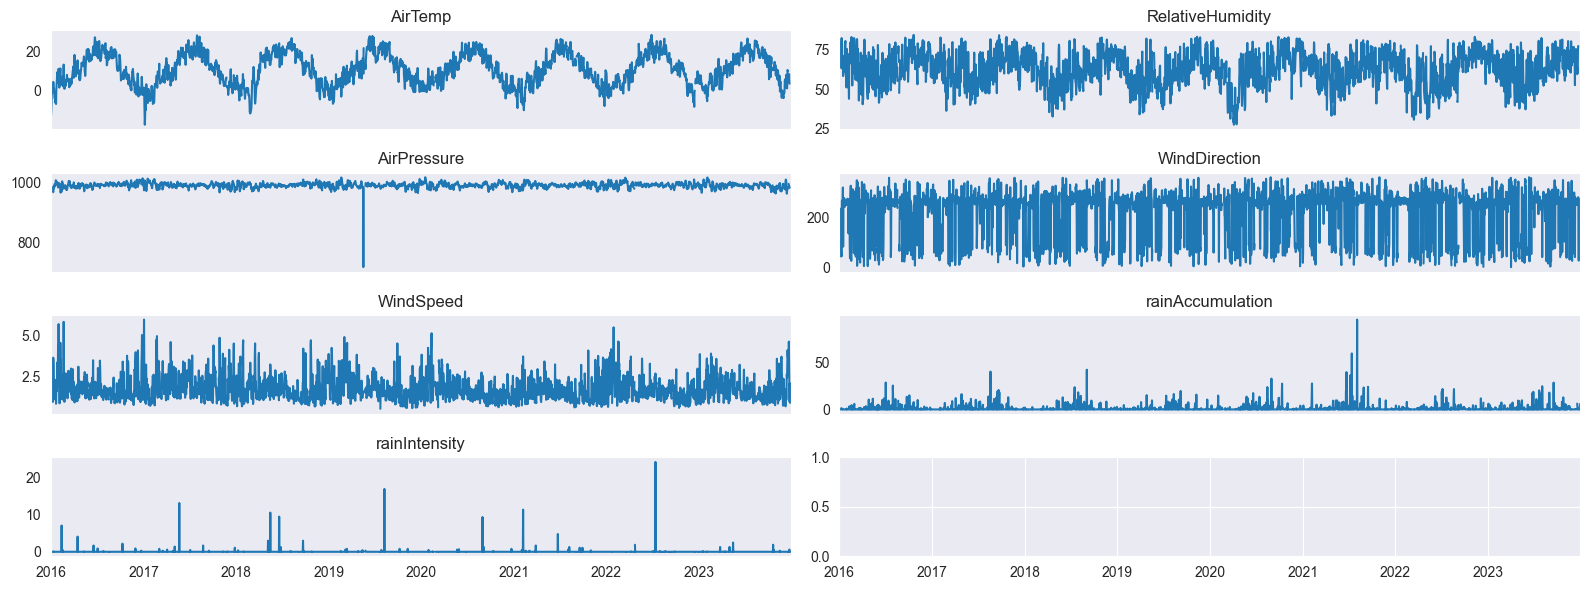

In [160]:
fig, axes = plt.subplots(4, 2, figsize=(16, 6), sharex=True)
for i, ax in enumerate(axes.flat): # different col number
    if i == 7:
        break
    df_mean.iloc[:, i].plot(ax=ax, title=df_mean.columns[i], legend=False)
    ax.set_xlim(df_mean.index[0], df_mean.index[-1])
    ax.grid()
fig.tight_layout()
plt.show()

In [161]:
df_mean['AirPressure'].sort_values(ascending=True)

2019-05-18    718.418182
2023-12-13    961.376389
2023-10-29    962.728819
2023-10-31    962.842222
2019-12-19    963.625278
                 ...    
2023-12-27           NaN
2023-12-28           NaN
2023-12-29           NaN
2023-12-30           NaN
2023-12-31           NaN
Name: AirPressure, Length: 2922, dtype: float64

In [162]:
df_max

,AirTemp,RelativeHumidity,AirPressure,WindDirection,WindSpeed,rainAccumulation,rainIntensity
2016-01-01,-7.6,74.6,1000.3,119.0,6.2,0.00,0.0
2016-01-02,-10.4,71.1,998.5,121.0,5.6,0.00,0.0
2016-01-03,-7.1,71.5,985.2,358.0,4.0,0.00,0.0
2016-01-04,-4.1,76.1,976.2,358.0,3.0,0.00,0.0
2016-01-05,-0.2,76.4,977.6,359.0,2.7,0.00,0.0
...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,NaN,358.0,4.8,0.03,0.0
2023-12-28,NaN,NaN,NaN,NaN,NaN,0.00,0.0
2023-12-29,NaN,NaN,NaN,NaN,NaN,1.94,0.0
2023-12-30,NaN,NaN,NaN,NaN,NaN,0.00,0.0


In [163]:
df_mean.loc['2019-05-18', 'AirPressure'] = df_mean['AirPressure'].median()
df_min.loc['2019-05-18', 'AirPressure'] = df_min['AirPressure'].median()

In [164]:
for f in dfs:
    mask = f.isnull().any(axis=1)
    display(f[mask])

,AirTemp,RelativeHumidity,AirPressure,WindDirection,WindSpeed,rainAccumulation,rainIntensity
2016-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,AirTemp,RelativeHumidity,AirPressure,WindDirection,WindSpeed,rainAccumulation,rainIntensity
2016-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,AirTemp,RelativeHumidity,AirPressure,WindDirection,WindSpeed,rainAccumulation,rainIntensity
2016-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
df_mean = df_mean.interpolate(method='time') 
df_min = df_min.interpolate(method='time') 
df_max = df_max.interpolate(method='time') 

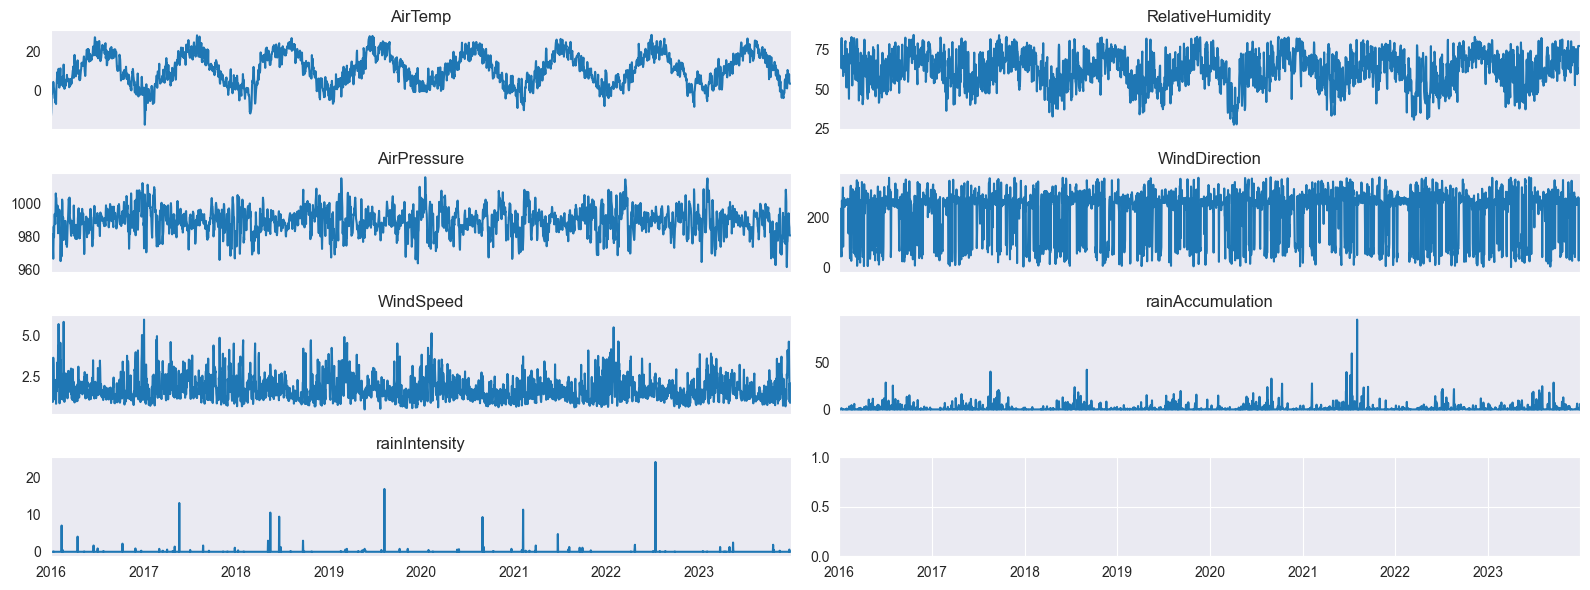

In [166]:
fig, axes = plt.subplots(4, 2, figsize=(16, 6), sharex=True)
for i, ax in enumerate(axes.flat): # different col number
    if i == 7:
        break
    df_mean.iloc[:, i].plot(ax=ax, title=df_min.columns[i], legend=False)
    ax.set_xlim(df_min.index[0], df_min.index[-1])
    ax.grid()     
fig.tight_layout()
plt.show()

In [167]:
day_cycle = pd.DataFrame(columns=df.columns, index=range(24))

In [168]:
# general diversity through the day
for column in df.columns:
    for hour in range(24):
        day_cycle.loc[hour, column] = df[column][df.index.hour == hour].mean()

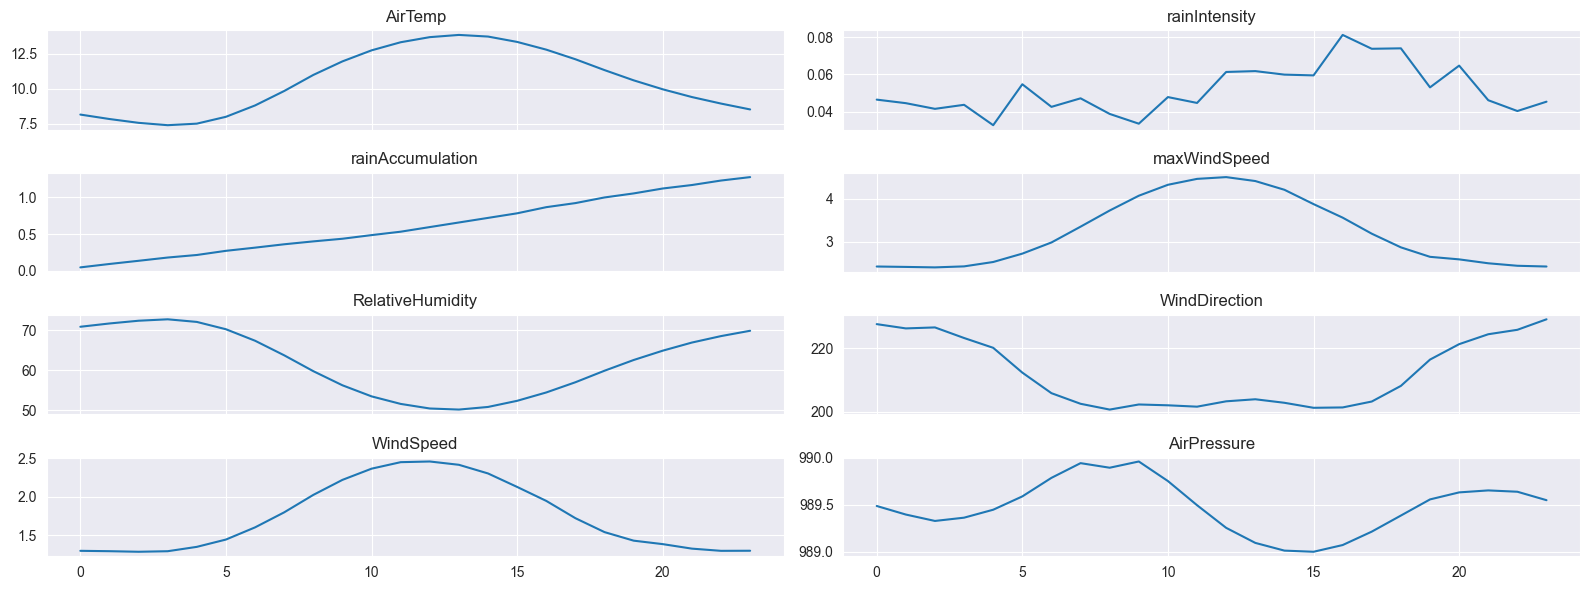

In [169]:
fig, axes = plt.subplots(4, 2, figsize=(16, 6), sharex=True)
for i, ax in enumerate(axes.flat):
    day_cycle.iloc[:, i].plot(ax=ax, title=day_cycle.columns[i], legend=False)

plt.tight_layout()
plt.show()

In [170]:
# temperature: lowest in the morning, highest in the afternoon
# humidity: opposite as the temperature
# wind speed: 
# rain:
# wind direction:
# air pressure: correct too, growing in the morning, rapid fall, then growing again

In [171]:
day_cycle

,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
0,8.145638,0.046421,0.047558,2.420277,70.932942,227.593395,1.296285,989.488727
1,7.825875,0.044517,0.093816,2.410729,71.758304,226.246459,1.291523,989.397653
2,7.551581,0.041473,0.137017,2.399858,72.446607,226.55528,1.283995,989.329689
3,7.382246,0.043634,0.181298,2.423246,72.804739,223.223955,1.291151,989.364439
4,7.493693,0.032693,0.215807,2.525177,72.148353,220.137943,1.347936,989.448881
5,7.985514,0.054663,0.272366,2.719716,70.309912,212.33227,1.443209,989.590353
6,8.800311,0.04254,0.31555,2.979106,67.427549,205.860234,1.601834,989.787409
7,9.837153,0.047116,0.361165,3.346854,63.770551,202.518663,1.797638,989.943651
8,10.990605,0.038741,0.400528,3.722529,59.789969,200.697131,2.025009,989.895004
9,11.963769,0.033504,0.436381,4.06656,56.247718,202.301418,2.220715,989.96123


In [172]:
day_cycle_scale_min = day_cycle.div(day_cycle.min())
day_cycle_scale_max = day_cycle.div(day_cycle.max())

In [173]:
display(day_cycle_scale_min)
display(day_cycle_scale_max)

,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
0,1.103409,1.419912,1.0,1.008508,1.414309,1.134014,1.009571,1.000492
1,1.060094,1.361672,1.972662,1.00453,1.430765,1.127303,1.005863,1.0004
2,1.022938,1.268555,2.881072,1.0,1.444489,1.128842,1.0,1.000331
3,1.0,1.334676,3.812153,1.009745,1.45163,1.112243,1.005573,1.000366
4,1.015097,1.0,4.537778,1.052219,1.438542,1.096866,1.049799,1.000452
5,1.081719,1.672007,5.727053,1.133282,1.401886,1.057974,1.123998,1.000595
6,1.192091,1.301211,6.635076,1.241368,1.344416,1.025726,1.247539,1.000794
7,1.332542,1.441167,7.594229,1.394605,1.2715,1.009076,1.400035,1.000952
8,1.488789,1.184991,8.421917,1.551145,1.192133,1.0,1.577116,1.000903
9,1.620614,1.024821,9.175796,1.6945,1.121505,1.007994,1.729535,1.00097


,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure
0,0.587574,0.572068,0.03736,0.537907,0.97429,0.993372,0.526883,0.999523
1,0.564508,0.548604,0.073698,0.535785,0.985627,0.987493,0.524947,0.999431
2,0.544723,0.511088,0.107636,0.533369,0.995081,0.988841,0.521887,0.999362
3,0.532508,0.537727,0.142421,0.538567,1.0,0.974301,0.524796,0.999397
4,0.540547,0.40289,0.16953,0.561221,0.990984,0.960832,0.547877,0.999482
5,0.576024,0.673634,0.213961,0.604457,0.965733,0.926762,0.586601,0.999625
6,0.634798,0.524244,0.247885,0.662107,0.926142,0.898514,0.651075,0.999824
7,0.709589,0.580631,0.283719,0.743839,0.875912,0.883929,0.730661,0.999982
8,0.792792,0.47742,0.314641,0.827333,0.821237,0.875979,0.823077,0.999933
9,0.86299,0.41289,0.342806,0.903794,0.772583,0.882981,0.902623,1.0


In [174]:
# shorter period - interpolation
df_filled = df.copy()
df_filled_min = df.copy()
df_filled_max = df.copy()

df_filled = df_filled.interpolate(method='time', limit=6)
df_filled_min = df_filled_min.interpolate(method='time', limit=6)
df_filled_max = df_filled_max.interpolate(method='time', limit=6)

In [175]:
missing_dates = df_filled[df_filled.isna().any(axis=1)]

In [176]:
df_max.AirTemp.loc[missing_dates.index.normalize().unique()]

2016-08-19    26.4
2016-08-20    26.8
2016-08-21    18.7
2016-08-24    25.0
2016-08-25    27.6
              ... 
2023-12-14     2.6
2023-12-17    12.9
2023-12-19     9.5
2023-12-20     7.8
2023-12-30     5.6
Name: AirTemp, Length: 147, dtype: float64

In [177]:
df_min.AirTemp.loc[missing_dates.index.normalize().unique()]

2016-08-19    13.966667
2016-08-20    16.100000
2016-08-21    14.900000
2016-08-24    17.400000
2016-08-25    13.200000
                ...    
2023-12-14    -0.200000
2023-12-17     6.500000
2023-12-19     1.966667
2023-12-20    -0.300000
2023-12-30     1.100000
Name: AirTemp, Length: 147, dtype: float64

In [178]:
negative_values = df_min.AirTemp.loc[missing_dates.index.normalize().unique()].sort_values()
negative_values = negative_values[2:]
negative_values = negative_values[negative_values < 0]
negative_values
df_min.AirTemp.loc[negative_values.index] = 0

C:\Users\PC\AppData\Local\Temp\ipykernel_17668\3411085520.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_min.AirTemp.loc[negative_values.index] = 0


In [179]:
for column in df_filled.drop(['maxWindSpeed', 'rainAccumulation'], axis=1).columns:
    # all missing dates with hours per column
    missing_full = df_filled[column][df_filled[column].isna()].index
    for full_date in missing_full: # each date with hour
        missing_date = full_date.normalize()
        #df_filled_min[full_date, column] = df_max.loc[missing_date, column] * day_cycle_scale_max.loc[full_date.hour, column]
        #df_filled_max[full_date, column] = df_min.loc[missing_date, column] * day_cycle_scale_min.loc[full_date.hour, column]
        
        # handling negative values
        if df_min.loc[missing_date, column] < 0: # max also negative
            # t' = max + min - t
            temp_min = day_cycle_scale_min.AirTemp.max() + day_cycle_scale_min.AirTemp.min() - day_cycle_scale_min.loc[:, column]
            temp_max = day_cycle_scale_max.AirTemp.max() + day_cycle_scale_max.AirTemp.min() - day_cycle_scale_max.loc[:, column]
            df_filled.loc[full_date, column] = (df_min.loc[missing_date, column] * temp_min[full_date.hour] + df_max.loc[missing_date, column] * temp_max[full_date.hour]) / 2
        else:
            df_filled.loc[full_date, column] = (df_min.loc[missing_date, column] * day_cycle_scale_min.loc[full_date.hour, column] + df_max.loc[missing_date, column] * day_cycle_scale_max.loc[full_date.hour, column]) / 2

In [180]:
for full_date in df_filled.maxWindSpeed[df_filled.maxWindSpeed.isna()].index:
    df_filled.loc[full_date, 'maxWindSpeed'] = df_max.loc[full_date.normalize(), 'WindSpeed'] * day_cycle_scale_max.loc[full_date.hour, 'WindSpeed']

In [192]:
for date in df_filled['rainAccumulation'][df_filled['rainAccumulation'].isna()].index:
    rain_accumulation = df_filled.loc[date.normalize():date, 'rainIntensity'].sum()
    df_filled.loc[date, 'rainAccumulation'] = rain_accumulation

In [193]:
df_filled[df_filled.maxWindSpeed <= df_filled.WindSpeed] # no mistakes

,AirTemp,rainIntensity,rainAccumulation,maxWindSpeed,RelativeHumidity,WindDirection,WindSpeed,AirPressure


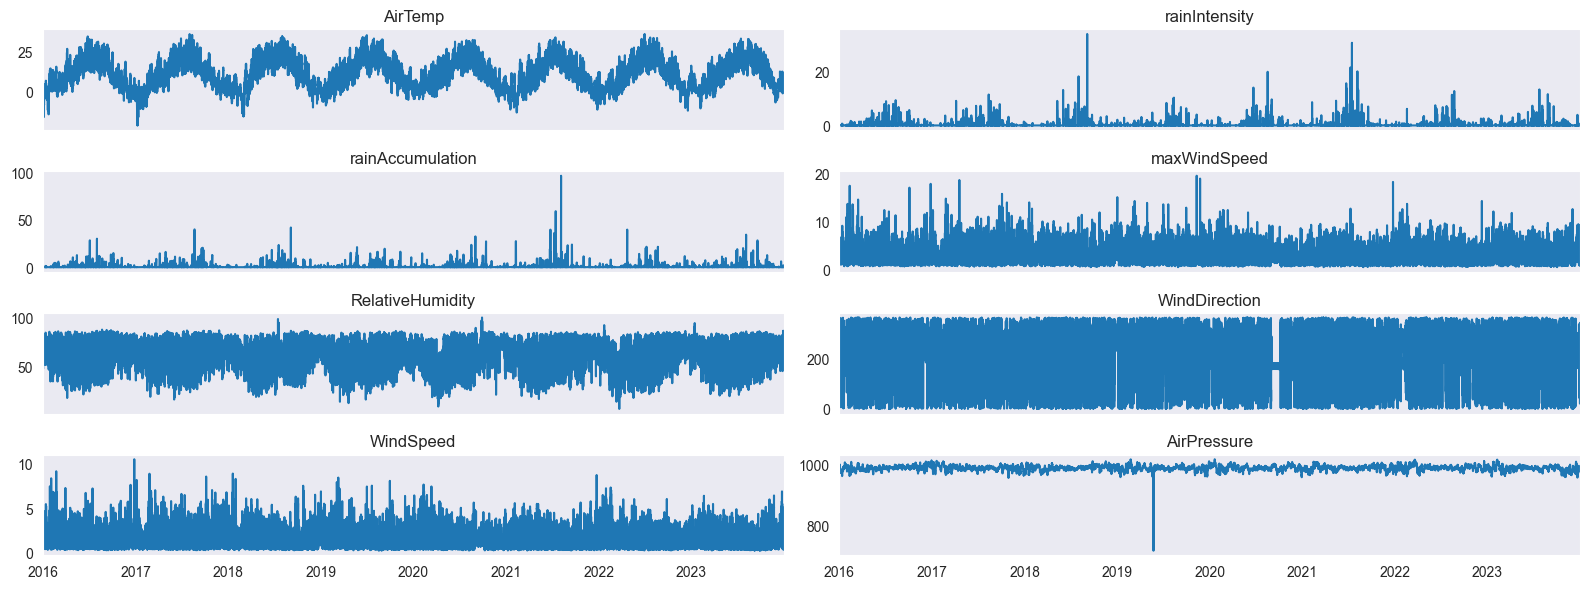

In [194]:
fig, axes = plt.subplots(4, 2, figsize=(16, 6), sharex=True)
for i, ax in enumerate(axes.flat): # different col number
    df_filled.iloc[:, i].plot(ax=ax, title=df_filled.columns[i], legend=False)
    ax.set_xlim(df_filled.index[0], df_filled.index[-1])
    ax.grid()     
fig.tight_layout()
plt.show()

In [195]:
df_filled.AirPressure[df_filled.AirPressure < 800] = df_filled.AirPressure.median()
df_filled.RelativeHumidity[df_filled.RelativeHumidity > 90] = 90

C:\Users\PC\AppData\Local\Temp\ipykernel_17668\1830153234.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_filled.AirPressure[df_filled.AirPressure < 800] = df_filled.AirPressure.median()
C:\Users\PC\AppData\Local\Temp\ipykernel_17668\

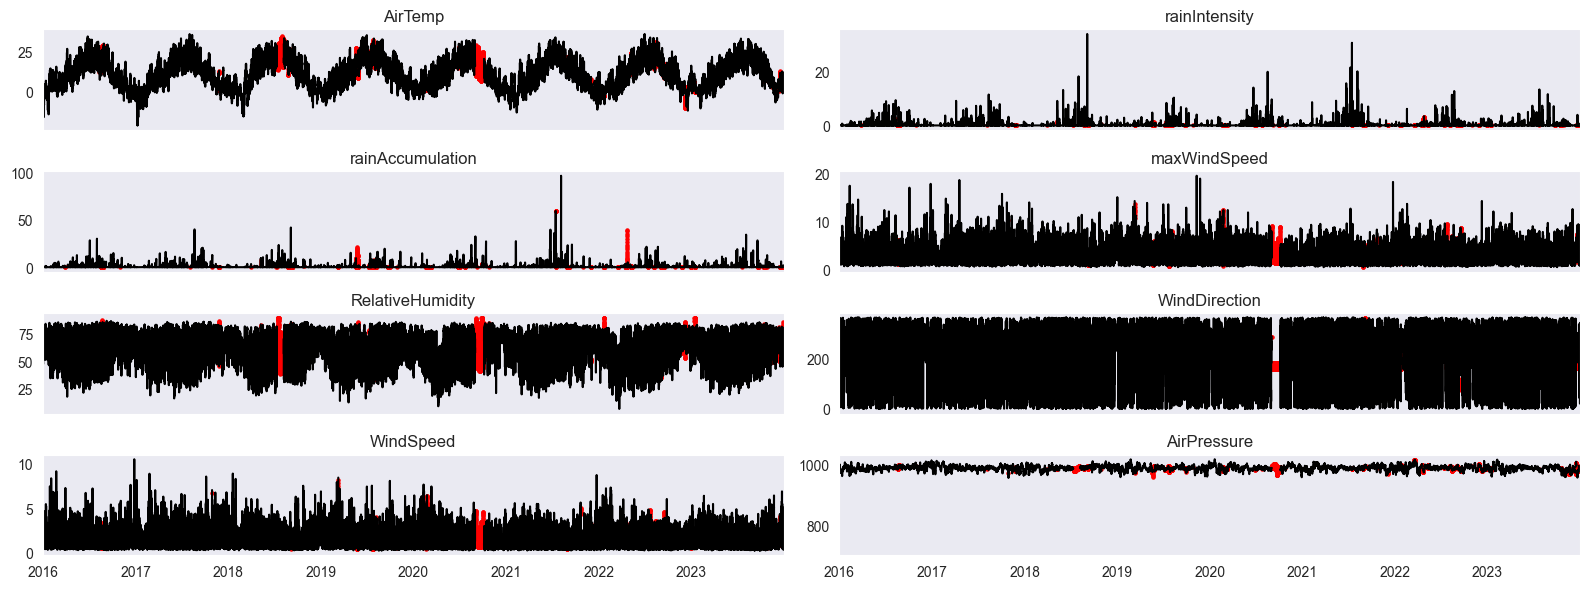

In [199]:
fig, axes = plt.subplots(4, 2, figsize=(16, 6), sharex=True)

for i, ax in enumerate(axes.flat):
    col = df_filled.columns[i]
    df[col].plot(ax=ax, color="black", label="Original", legend=False)
    
    ax.scatter(df_filled[col][df[col].isna()].index, df_filled[col][df[col].isna()], color="red", label="Imputed", s=5)

    ax.set_title(col)
    ax.set_xlim(df_filled.index[0], df_filled.index[-1])
    ax.grid()

#axes[0, 0].legend(["Original", "Imputed"])

fig.tight_layout()
plt.show()


In [200]:
df_filled.to_csv('weather_filled.csv')